INTRODUÇÃO: O objetivo desta análise é apenas para estudo, na análise contém uma database, contendo os seguintes contéudos, o salario de cada cargo, local da empresa, o ano e o tipo de trabalho. Então vamos ao problema.

Uma empresa responsavél por controlar as ações de outras empresas,começou a enfrentar um problema sério uma quantidade crescente de funcionários estava parando de trabalhar sem explicação aparente. Então decidiu procurar ajuda externa para uma análise específica e crucial, ela veio até nós e pediu paramos encontrar o do por que dessa queda sem explicação.Ela nos forneceu esse database, para analisar, encontrar o problema e encontrar uma possível solução.

1.IMPORTANOD LIBS

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import generalização


IMPORTANDO ARQUIVO

In [108]:
salario_df = pd.read_csv('ds_salaries.csv')

In [109]:
salario_df

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


2.PRÉ PROCESSAMENTO DOS DADOS

2.1 quantidade de colunas e linhas do database

In [110]:
print(f'Quantidade de coluna {salario_df.shape[1]}')
print(f'Quantidade de linhas {salario_df.shape[0]}')

Quantidade de coluna 12
Quantidade de linhas 607


2.2 informações das colunas

In [111]:
salario_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


2.3 Código para saber se existe linhas vazias ou não.

In [112]:
salario_df.isnull().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

2.4 colunas existente no meu database

In [113]:
print(salario_df.columns)
print(f' Existem {salario_df.shape[1]} colunas ')

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
 Existem 12 colunas 


In [114]:
salario_df.\
    select_dtypes(object).\
        describe().\
            transpose()

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


3 TRATAMENTO DOS DADOS

3.1 Após uma breve analisar, iremos excluir colunas desnecessária para a nossa a análise nas quais repetem os mesmo valores, ou valores que não serão útil.

In [115]:
salario_df.drop(columns=['id','company_size','employee_residence','salary_in_usd'], axis=1 ,inplace=True)

In [116]:
salario_df.head(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location
0,2020,MI,FT,Data Scientist,70000,EUR,0,DE
1,2020,SE,FT,Machine Learning Scientist,260000,USD,0,JP
2,2020,SE,FT,Big Data Engineer,85000,GBP,50,GB
3,2020,MI,FT,Product Data Analyst,20000,USD,0,HN


3.2 Renomeando as colunas

In [117]:
salario_df.rename(columns={
    'work_year':'data_trabalho','experience_level':'nivel_experiencia',
    'employment_type':'tipo_emprego','job_title':'cargo','salary':'salario',
    'salary':'salario','salary_currency':'moeda_salario','remote_ratio':'relaçao_remota',
    'company_location':'localidade_empresa'
}, inplace=True)

In [118]:
salario_df.head(5)

,data_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,relaçao_remota,localidade_empresa
0,2020,MI,FT,Data Scientist,70000,EUR,0,DE
1,2020,SE,FT,Machine Learning Scientist,260000,USD,0,JP
2,2020,SE,FT,Big Data Engineer,85000,GBP,50,GB
3,2020,MI,FT,Product Data Analyst,20000,USD,0,HN
4,2020,SE,FT,Machine Learning Engineer,150000,USD,50,US


In [119]:
for  i in salario_df[['nivel_experiencia','tipo_emprego','moeda_salario','cargo']]:
    salario_df[i] = salario_df[i].apply(lambda x: x.upper())


In [120]:
for coluna in [
    'moeda_salario',
    'localidade_empresa',
    'nivel_experiencia',
    'tipo_emprego'
    ]:
    print(f'Valores único de: {coluna} {salario_df[coluna].unique()}\n')

Valores único de: moeda_salario ['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']

Valores único de: localidade_empresa ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']

Valores único de: nivel_experiencia ['MI' 'SE' 'EN' 'EX']

Valores único de: tipo_emprego ['FT' 'CT' 'PT' 'FL']



4. ANALISE EXPLORATÓRIA e VISUALIZAÇÃO GRAFICA.


In [121]:
salario_df.head()

,data_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,relaçao_remota,localidade_empresa
0,2020,MI,FT,DATA SCIENTIST,70000,EUR,0,DE
1,2020,SE,FT,MACHINE LEARNING SCIENTIST,260000,USD,0,JP
2,2020,SE,FT,BIG DATA ENGINEER,85000,GBP,50,GB
3,2020,MI,FT,PRODUCT DATA ANALYST,20000,USD,0,HN
4,2020,SE,FT,MACHINE LEARNING ENGINEER,150000,USD,50,US


#Código para saber os 10 melhores salario dos Data Analyst, podemos analisar também que o nível de experiencia influência
muito no salário.

In [122]:
salario_analista = salario_df.loc[
    salario_df['cargo'] == 'Data Analyst',
    ['cargo','nivel_experiencia','salario']
    ]

salario_analista_agrupado = salario_analista.groupby\
    (['cargo','nivel_experiencia'])[['salario']].value_counts().\
        reset_index()

salario_analista_top_10 = salario_analista.sort_values(by='salario', ascending=False).\
    reset_index(drop=True)
salario_analista_top_10.head(10)

,cargo,nivel_experiencia,salario


#dashboard que mostra o salario de analista de dados por experiência.

Text(0, 0.5, 'Salario')

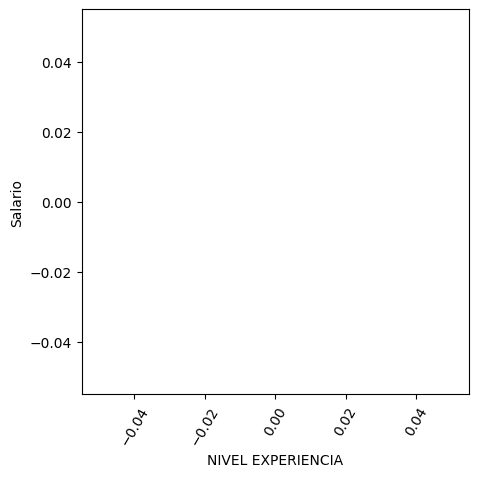

In [123]:
fig , ax = plt.subplots(figsize=(5,5))
ax.bar(salario_analista_top_10['nivel_experiencia'], 
       salario_analista_top_10['salario'], 
       label='red',
        color='b' )
labels = ax.get_xticklabels()
plt.setp(labels, rotation=60)
ax.set_xlabel(xlabel='NIVEL EXPERIENCIA')
ax.set_ylabel(ylabel='Salario')

#Agrupamento para saber as melhores moedas que mais paga

In [124]:

moedas = salario_df.groupby(['moeda_salario'])['salario'].sum().reset_index()
moedas_mais_bem_paga = moedas.sort_values(by='salario', ascending=False)
moedas_mais_bem_paga

,moeda_salario,salario
10,INR,55734997
16,USD,54631386
4,CLP,30400000
9,HUF,22000000
11,JPY,19950000
7,EUR,5441699
8,GBP,2712856
2,CAD,2214500
12,MXN,778000
5,CNY,539000


#dashboard que mostra qual é a moeda que mais bem paga entre os cargos que estão no database.


In [125]:
cores = []
for numeros in moedas_mais_bem_paga['salario'].sort_values( ascending=True):
        if numeros >= 480000:
                cores.append('#8d1515')
        else:
                cores.append('#ffdf00')
fig = px.bar(moedas_mais_bem_paga, x='moeda_salario', y='salario',text_auto='.2s',
             color_discrete_sequence=[cores])
fig.update_layout(
    title='Dashboard MOEDAS MAIS BEM PAGA',
    xaxis_title='nome da moeda',
    yaxis_title='soma de salario',
    font=dict(color='#bcd4e6'),
    plot_bgcolor='#2d3142',
    paper_bgcolor='#2d3142'
    )
fig.update_traces(textfont_size=13,textangle=0,textposition='outside', cliponaxis=False)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

#agrupamento dos cargos mais bem pagos

In [126]:

cargo_mais_bem_pago = salario_df.groupby(['cargo'])[['salario']].sum().\
    reset_index()
cargo_mais_bem_pago_10 = cargo_mais_bem_pago.sort_values(by='salario',ascending=False).\
    reset_index(drop=True).head(10)
cargo_mais_bem_pago_10

,cargo,salario
0,DATA SCIENTIST,72693650
1,DATA ENGINEER,23655793
2,ML ENGINEER,16060000
3,DATA SCIENCE MANAGER,12751183
4,BI DATA ANALYST,11412272
5,MACHINE LEARNING ENGINEER,11181433
6,DATA ANALYST,9370681
7,HEAD OF MACHINE LEARNING,6000000
8,BIG DATA ENGINEER,3640000
9,LEAD DATA SCIENTIST,3305000


#dashboard para visualizar quais o cargo mais bem pago

In [127]:
cores = ['#a67c00','#bf9b30','#ffbf00','#ffcf40','#ffdc73','#ffdc73','#ffdc73','#ffdc73','#ffdc73','#ffdc73']
fig = go.Figure(layout=go.Layout(width=1000, height=600))
fig.add_trace(
    go.Funnel(
        x=cargo_mais_bem_pago_10['salario'], y=cargo_mais_bem_pago_10['cargo'],
        textinfo= "value+percent initial",
        textfont_size=12,
        textangle=0,
        textposition='inside',
        cliponaxis=False,
        marker=dict(color=cores)
    )
)

fig.update_layout(
    title='Dashboard Funil dos cargos mais bem pagos',
    xaxis_title = 'SALARIO',
    paper_bgcolor='#2d3142',
    plot_bgcolor='#2d3142',
    font=dict(color='white')
)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [128]:
salario_df

,data_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,relaçao_remota,localidade_empresa
0,2020,MI,FT,DATA SCIENTIST,70000,EUR,0,DE
1,2020,SE,FT,MACHINE LEARNING SCIENTIST,260000,USD,0,JP
2,2020,SE,FT,BIG DATA ENGINEER,85000,GBP,50,GB
3,2020,MI,FT,PRODUCT DATA ANALYST,20000,USD,0,HN
4,2020,SE,FT,MACHINE LEARNING ENGINEER,150000,USD,50,US
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,DATA ENGINEER,154000,USD,100,US
603,2022,SE,FT,DATA ENGINEER,126000,USD,100,US
604,2022,SE,FT,DATA ANALYST,129000,USD,0,US
605,2022,SE,FT,DATA ANALYST,150000,USD,100,US


#crianado uma nova coluna, fazendo relação com relação_remota, para saber quais sao o tipo de modelo de trabalho, 0 presencial, 50 hibrida, 100 home office.

In [129]:
nova_lista = []

for valores in salario_df['relaçao_remota']:
    if valores == 0:
        nova_lista.append('Presencial')
    elif valores == 50:
        nova_lista.append('Hibrido')
    elif valores == 100:
        nova_lista.append("Home office")

salario_df['modelo_trabalho'] = nova_lista

salario_df

,data_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,relaçao_remota,localidade_empresa,modelo_trabalho
0,2020,MI,FT,DATA SCIENTIST,70000,EUR,0,DE,Presencial
1,2020,SE,FT,MACHINE LEARNING SCIENTIST,260000,USD,0,JP,Presencial
2,2020,SE,FT,BIG DATA ENGINEER,85000,GBP,50,GB,Hibrido
3,2020,MI,FT,PRODUCT DATA ANALYST,20000,USD,0,HN,Presencial
4,2020,SE,FT,MACHINE LEARNING ENGINEER,150000,USD,50,US,Hibrido
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,DATA ENGINEER,154000,USD,100,US,Home office
603,2022,SE,FT,DATA ENGINEER,126000,USD,100,US,Home office
604,2022,SE,FT,DATA ANALYST,129000,USD,0,US,Presencial
605,2022,SE,FT,DATA ANALYST,150000,USD,100,US,Home office


#agrupamento para saber a quantidade de pessoas que tem relacionamento com remoto e qual é o modelo de trabalho que é mais bem pago

In [130]:
quantidade_relaçao_remota = salario_df.groupby(['relaçao_remota','modelo_trabalho'])['nivel_experiencia'].count().reset_index()
quantidade_relaçao_remota


,relaçao_remota,modelo_trabalho,nivel_experiencia
0,0,Presencial,127
1,50,Hibrido,99
2,100,Home office,381


In [131]:
fig = go.Figure(layout=go.Layout(width=500,height=400))
fig.add_trace(go.Scatter(x=quantidade_relaçao_remota['modelo_trabalho'],
                        y=quantidade_relaçao_remota['nivel_experiencia'],
                        mode='markers',
                        marker=dict(size=[30, 40, 60],color=['#c152ea ', '#ea52c7', '#7552ea'])
            ))
fig.update_layout(
    title='Quantidade de pessoas com relação remota',
    xaxis_title='MODELO DE TRABALHO',
    yaxis_title = 'Quantidade de pessoas',
    plot_bgcolor='#2d3142',
    paper_bgcolor='#2d3142',
    font=dict(color='white')
)

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

#agrupando o modelo_trabalho com o salario, para ter uma ideia dos modelos que mais é pago.

In [132]:
modelo_mais_bem_pago = salario_df.groupby(['modelo_trabalho'])[['salario']].sum().reset_index()
modelo_mais_bem_pago.reset_index(drop=True).sort_values(by='salario',ascending=False)


,modelo_trabalho,salario
1,Home office,98869463
0,Hibrido,70093799
2,Presencial,27704776


In [133]:

fig = go.Figure(layout=go.Layout(width=500,height=400))
fig.add_trace(go.Bar(x=modelo_mais_bem_pago['modelo_trabalho'], 
           y=modelo_mais_bem_pago['salario'],
           marker_color='#400c0c'))

fig.update_layout(title='MODELO MAIS BEM PAGO',
                  xaxis_title='MODELO DE TRABALHO',
                  yaxis_title='SALARIO',
                  plot_bgcolor='#2d3142',
                  paper_bgcolor='#2d3142',
                  font=dict(color='white'),
                )

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

fazendo separação dos meus anos e calculando a soma de salario pra cada data.

In [134]:
print(salario_df['data_trabalho'].unique())
data_2020 = salario_df.loc[salario_df['data_trabalho'] == 2020]
data_2021 = salario_df.loc[salario_df['data_trabalho'] == 2021]
data_2022 = salario_df.loc[salario_df['data_trabalho'] == 2022]

[2020 2021 2022]


In [135]:
salario_2020 = data_2020['salario'].sum()
salario_2021 = data_2021['salario'].sum()
salario_2022 = data_2022['salario'].sum()
print(f"salarios \nsalario de 2020 R${salario_2020}\nsalario de 2021 R${salario_2021}\nsalario de 2022 R${salario_2022}")

salarios 
salario de 2020 R$27531809
salario de 2021 R$118628993
salario de 2022 R$50507236


#agrupando a quantidade de salario pra cada modelo de cada ano, por exemplo o ano de 2020 qual foi o modelo de trabalho que mais ganhou.


In [136]:
listas_de_anos = [data_2020,data_2021,data_2022]
for data in listas_de_anos:
    print(f'Modelo de trabalho do ano de {data['data_trabalho'].unique()} {data.groupby('modelo_trabalho')['salario'].sum().sort_values(ascending=False)}')


Modelo de trabalho do ano de [2020] modelo_trabalho
Hibrido        13193500
Home office     8609109
Presencial      5729200
Name: salario, dtype: int64
Modelo de trabalho do ano de [2021] modelo_trabalho
Home office    55706169
Hibrido        49515299
Presencial     13407525
Name: salario, dtype: int64
Modelo de trabalho do ano de [2022] modelo_trabalho
Home office    34554185
Presencial      8568051
Hibrido         7385000
Name: salario, dtype: int64


In [137]:
modelito = salario_df.groupby(['data_trabalho','modelo_trabalho'])['salario'].sum().reset_index()
modelito.sort_values(by='salario', ascending=False)

fig = px.line(modelito, x='data_trabalho',y='salario', color='modelo_trabalho',
              width=1100,height=500,
              color_discrete_sequence=['#88d8b0',' #2a9d8f','#e76f51'])

fig.update_layout(
    title='GRÁFICO PARA SABER O AUMENTO E A QUEDA DE SALARIO DE CADA ANO',
    xaxis_title='modelo de trablho',
    yaxis_title='salario',
    paper_bgcolor='#f1faee',
    plot_bgcolor='#2d3142',
    font=dict(color='#2d3142'),
)
fig.update_traces(mode='lines+markers')
fig.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#o código abaixo é um laço de repetição aonde faz uma busca pela quantidade de pessoas que trabalhou como home office, hibrido e presencial para cada ano.

In [138]:
for valores in listas_de_anos:
    fig = go.Figure(layout=go.Layout(width=500, height=500))
    fig.add_trace(go.Histogram(histfunc='count', x=valores['modelo_trabalho'], marker_color='#bcd4e6'))
    fig.update_layout(title=f'relação remota do de {valores['data_trabalho'].unique()}',
                      xaxis_title='modelo de trabalho',
                      yaxis_title='quantidade',
                      paper_bgcolor='#2d3142',
                      plot_bgcolor='#2d3142',
                      font=dict(color='white'))
    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

for relacao in listas_de_anos:
    variavel_relacao = relacao.groupby('modelo_trabalho')['modelo_trabalho'].\
        value_counts().sort_values(ascending=False)
    print(f'Relação remota do ano de {relacao['data_trabalho'].unique()} {variavel_relacao}')

Relação remota do ano de [2020] modelo_trabalho
Home office    36
Hibrido        21
Presencial     15
Name: count, dtype: int64
Relação remota do ano de [2021] modelo_trabalho
Home office    117
Hibrido         66
Presencial      34
Name: count, dtype: int64
Relação remota do ano de [2022] modelo_trabalho
Home office    228
Presencial      78
Hibrido         12
Name: count, dtype: int64


#Análise para saber a quantidade de funcionario por experiencia.

In [139]:
funcionarios = salario_df.groupby('nivel_experiencia')[['nivel_experiencia']].value_counts().reset_index()
funcionarios

,nivel_experiencia,count
0,EN,88
1,EX,26
2,MI,213
3,SE,280


In [140]:
fig = px.histogram(funcionarios, x='nivel_experiencia', y='count',
                   width=500, height=400,
                   color_discrete_sequence=['#ffdf00'])
fig.update_layout(
    title='QUANTIDADE DE FUNCIONARIO',
    xaxis_title='funcionarios',
    yaxis_title='quantidade de funcionario',
    paper_bgcolor='#2d3142',
    plot_bgcolor='#2d3142',
    font=dict(color='white')
)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

#análise para saber qual é a localidade da empresa que possui mais funcionarios buscando apenas localidade da empresa que possui mais de 2 funcionarios.



In [141]:
agrupamento_funcionario = salario_df.groupby(['localidade_empresa'])['nivel_experiencia'].count().reset_index()
qtd_funcionario_emp = agrupamento_funcionario.loc[agrupamento_funcionario['nivel_experiencia'] > 2].sort_values(by='nivel_experiencia',ascending=False)
qtd_funcionario_emp.head(10)

,localidade_empresa,nivel_experiencia
48,US,355
18,GB,47
6,CA,30
12,DE,28
25,IN,24
17,FR,15
16,ES,14
19,GR,11
29,JP,6
2,AT,4


In [142]:
cores = ['#fb4934','#fa8a34', '#facc34', '#34fa91', '#dadada','#7f1734','#ffbf00']
fig  = go.Figure(layout=go.Layout(width=1000, height=400))

fig.add_trace(
    go.Pie(
        labels=qtd_funcionario_emp['localidade_empresa'], values=qtd_funcionario_emp['nivel_experiencia'],
        marker=dict(colors=cores)
    )
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Porcentagem de funcionario por pais',
                  xaxis_title='paises',
                  paper_bgcolor='#2d3142',
                  plot_bgcolor='#2d3142',
                  font=dict(color='white')
                  )
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

#Este código logo abaixo, possui 4 listas que sao adicionadas valores do salario de cada tipo de emprego para cada ano

In [143]:
backup_anos = list(salario_df['data_trabalho'].unique())
CT_dados = []
FL_dados = []
FT_dados = []
PT_dados = []
for valor in listas_de_anos:
    agrupamento_emprego = valor.groupby(['data_trabalho','tipo_emprego'])['salario'].sum().reset_index()
    FT_dados.append(agrupamento_emprego.iloc[2][2])
    CT_dados.append(agrupamento_emprego.iloc[0][2])
    FL_dados.append(agrupamento_emprego.iloc[1][2])
    PT_dados.append(agrupamento_emprego.iloc[3][2])

C:\Users\gabri\AppData\Local\Temp\ipykernel_10724\3987458780.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\gabri\AppData\Local\Temp\ipykernel_10724\3987458780.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\gabri\AppData\Local\Temp\ipykernel_10724\3987458780.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\gabri\AppData\Local\Temp\ipykernel_10724\3987458780.py:11: FutureWarning:

Series.__get

#Dashboard mostrando o salario para cada tipo de emprego em cada ano existente no meu database.

In [144]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adiciona valores no gráfico
fig.add_trace(
    go.Scatter(x=backup_anos, y=FT_dados, name="FT DADOS"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=backup_anos, y=CT_dados, name="CT DADOS"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=backup_anos, y=FL_dados, name="FL DADOS"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=backup_anos, y=PT_dados, name="PT DADOS"),
    secondary_y=True,
)

# Adiciona figura
fig.update_layout(
    title_text="Salario de cada ano, para cada tipo de emprego",
    paper_bgcolor = '#2d3142',
    plot_bgcolor = '#2d3142',
    font=dict(color='white')
)

# titulo do eixo x
fig.update_xaxes(title_text="Datas")

# Titulo dos dois eixos y
fig.update_yaxes(title_text="<b>Primeiro eixo y </b> valores de FT dados", secondary_y=False)
fig.update_yaxes(title_text="<b>Segundo eixo y</b> Valores de outros dados", secondary_y=True)

fig.show()

#Este código executa um agrupamento aonde busca o cargo e modelo de trabalho, depois uma query, selecionando somente o modelo de trabalho desejado. O objetivo do código é saber a quantidade de pessoas de um determinado cargo que trabalham com os modelo de trabalho.

In [145]:
agrupamento_modelo_trabalho = salario_df.groupby(['cargo','modelo_trabalho',])['cargo'].value_counts().reset_index()
ordendando_agrupamento_modelo_trabalho = agrupamento_modelo_trabalho.sort_values(by='count',ascending=False)
homeoffice_contagem = ordendando_agrupamento_modelo_trabalho.query("modelo_trabalho == 'Home office'").head(5)
presencial_contagem = ordendando_agrupamento_modelo_trabalho.query("modelo_trabalho == 'Presencial'").head(5)
hibrido_contagem = ordendando_agrupamento_modelo_trabalho.query("modelo_trabalho == 'Hibrido'").head(5)

lista_de_dataframes = [homeoffice_contagem,presencial_contagem,hibrido_contagem]
for i in lista_de_dataframes:
    print(f'GRÁFICO DA MODALIDADE| {i.iloc[2][1]}')
    generalização.grafico_barra(i['cargo'], i['count'])

GRÁFICO DA MODALIDADE| Home office


C:\Users\gabri\AppData\Local\Temp\ipykernel_10724\37047585.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



GRÁFICO DA MODALIDADE| Presencial


GRÁFICO DA MODALIDADE| Hibrido


In [146]:
salario_df.head(5)

,data_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,relaçao_remota,localidade_empresa,modelo_trabalho
0,2020,MI,FT,DATA SCIENTIST,70000,EUR,0,DE,Presencial
1,2020,SE,FT,MACHINE LEARNING SCIENTIST,260000,USD,0,JP,Presencial
2,2020,SE,FT,BIG DATA ENGINEER,85000,GBP,50,GB,Hibrido
3,2020,MI,FT,PRODUCT DATA ANALYST,20000,USD,0,HN,Presencial
4,2020,SE,FT,MACHINE LEARNING ENGINEER,150000,USD,50,US,Hibrido


In [147]:
local_com_mais_funcionario = salario_df.groupby('localidade_empresa')['modelo_trabalho'].value_counts().reset_index()
local_com_mais_funcionario.sort_values(by='count', ascending=False)


,localidade_empresa,modelo_trabalho,count
80,US,Home office,266
81,US,Presencial,69
82,US,Hibrido,20
32,GB,Presencial,19
11,CA,Home office,19
...,...,...,...
47,IR,Home office,1
51,JP,Home office,1
52,KE,Home office,1
54,LU,Hibrido,1


RESUMO DO INSIGHT GERADO: Os dados nos dizem que em 2021 teve um pico de salario e um acumulo maior de funcionario, além de que o trabalho como o home office sempre está no topo dos dados, mostrando que a maioria dos funcionarios gostam de trabalhar como home office e quando há um queda do trabalho 100% remoto, podemos ver uma queda dos funcionarios e consequentemente uma queda de salário também, podemos analisar também que a maior quantidade de funcionarios está concentrada no US(Estados Unidos) no qual é a moeda é a segunda mais bem paga.

SOLUÇÃO: 1. Reforço do Modelo de Trabalho Flexível

Dado o forte apelo pelo trabalho em home office demonstrado pelos dados, a empresa deve continuar a apoiar e expandir esse modelo, oferecendo flexibilidade aos funcionários. Isso inclui:

Implementar políticas que permitam aos funcionários escolher entre trabalho remoto e presencial de acordo com suas necessidades e preferências.
Investir em tecnologia e infraestrutura para garantir a eficiência e segurança do trabalho remoto.

2. Estratégias de Retenção de Talentos

Para evitar a queda de funcionários em períodos de transição para o trabalho presencial, a empresa pode adotar medidas para reter talentos, tais como:

Oferecer benefícios adicionais para funcionários que optem por continuar trabalhando em home office, como flexibilidade de horários e programas de bem-estar.
Desenvolver programas de treinamento e desenvolvimento para capacitar os funcionários e promover o crescimento profissional dentro da empresa.

3. Políticas Salariais Competitivas

Considerando que a maior quantidade de funcionários está concentrada nos Estados Unidos, onde a moeda é a segunda mais bem paga, a empresa deve:

Revisar e ajustar as políticas salariais para garantir que sejam competitivas e atrativas para reter talentos nessa região.
Realizar análises periódicas do mercado para manter-se atualizada em relação às práticas salariais do setor.

4. Monitoramento e Análise Contínuos

    Para garantir a eficácia das estratégias implementadas, é crucial:

Estabelecer um sistema de monitoramento contínuo para acompanhar a satisfação dos funcionários, taxas de retenção e tendências de trabalho.
Realizar análises regulares dos dados para identificar padrões e oportunidades de melhoria.

5. Comunicação Transparente e Envolvimento dos Funcionários

Manter uma comunicação aberta e transparente é fundamental para o sucesso das iniciativas:

Comunicar claramente as políticas e benefícios relacionados ao trabalho flexível e remuneração.
Envolver os funcionários em discussões e decisões que impactam seus locais de trabalho e remuneração.

Essa solução estratégica visa aproveitar os insights gerados pelos dados para promover um ambiente de trabalho inclusivo, flexível e competitivo, alinhado às necessidades e preferências dos funcionários, e contribuindo para o sucesso e crescimento sustentável da empresa.



CONCLUSÃO :
Pico de Salário em 2021 e Acúmulo de Funcionários:
    O ano de 2021 apresentou um pico significativo de salário, acompanhado por um aumento no número de funcionários. Isso sugere um período de prosperidade e crescimento para a empresa nesse período.

Preferência pelo Trabalho em Home Office:
    Os dados destacam que a modalidade de trabalho em home office está consistentemente no topo das preferências dos funcionários.Isso reflete uma tendência crescente de aceitação e preferência pelo trabalho remoto.

Impacto da Transição para o Trabalho Presencial:
    Quando há uma queda na disponibilidade do trabalho 100% remoto, observa-se uma diminuição no número de funcionários, o que consequentemente leva a uma redução nos salários. Isso sugere que a flexibilidade no modelo de trabalho pode ser um fator importante para reter talentos e manter a satisfação dos funcionários.

    Concentração de Funcionários nos Estados Unidos (EUA):
    A maioria dos funcionários está concentrada nos Estados Unidos, que também é onde a moeda é a segunda mais bem paga. Isso indica a importância estratégica desse mercado para a empresa e destaca a necessidade de políticas salariais competitivas nessa região.

Esses insights fornecem uma base sólida para a tomada de decisões estratégicas relacionadas a políticas de trabalho, remuneração e gestão de talentos. A empresa pode utilizar essas informações para adaptar suas estratégias de acordo com as preferências e necessidades dos funcionários, mantendo assim um ambiente de trabalho produtivo e satisfatório.